# Project: The General Model Project

## Table of Contents

- <a href='#dataset'>1. Data Set Description</a> 
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingChest'>2.1. Dataset Of Chest_radiographs?</a>
    - <a href='#wranglingBrain'>2.2. Dataset Of Brain Tumor?</a>
    - <a href='#wranglingHeart'>2.3. Dataset Of Heart Rays?</a>
    - <a href='#wranglingSkin'>2.4. Dataset Of Skin Cancer?</a>
    - <a href='#wranglingRetinal'>2.4. Dataset Of Retinal OCT?</a>
    - <a href='#wranglingCoco'>2.5. Dataset Of Coco Dataset?</a>
- <a href='#info'>4.1. Show Information Of DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#scrath'>5.2.1. Model from Scratch </a>
             - <a href='#scrathf'>5.2.1.1. Model from Simple Scratch</a>
        - <a href='#VGG16'>5.2.2. Model VGG16</a>
            - <a href='#trainVGG16'>5.2.2.1. Model VGG16 ( trainable  )</a>
            - <a href='#freezeVGG16'>5.2.2.2. Model VGG16 ( false trainalbe ) </a>
        - <a href='#ResNet152V2'>5.2.3. Model ResNet152V2</a>
            - <a href='#trainResNet152V2'>5.2.3.1. Model ResNet152V2 ( trainable  )</a>
            - <a href='#freezeResNet152V2'>5.2.3.2. Model ResNet152V2 ( false trainalbe )</a>
        - <a href='#Xception'>5.2.4. Model Xception</a>
            - <a href='#aXception'>5.2.4.1. Model Xception  ( trainable  )</a>
            - <a href='#bXception'>5.2.4.2. Model Xception ( false trainalbe )</a>
        - <a href='#MobileNet'>5.2.5. Model MobileNet</a>
            - <a href='#trainMobileNet'>5.2.5.1. Model MobileNet  ( trainable  )</a>
            - <a href='#freezeMobileNet'>5.2.5.2. Model MobileNet ( false trainalbe )</a>
        - <a href='#InceptionV3'>5.2.6. Model InceptionV3</a>
            - <a href='#trainInceptionV3'>5.2.6.1. Model InceptionV3</a>
            - <a href='#freezeInceptionV3'>5.2.6.2. Model InceptionV3 ( false trainalbe )</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='dataset'></a>
## Data Set Description

Heartbeat images:
A group of pictures used to describe heart disease
https://www.kaggle.com/datasets/gogogogo123/heartbeats.

Chest x-ray images:
A set of pictures used to describe chest diseases
https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database.
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia.

Brain tumor images:
A group of pictures used to describe brain tumor diseases
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri.

Skin cancer images:
A group of images used to describe skin cancer diseases
https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000.

Retinal OCT Diseases images:
A set of images used to describe retinal oct diseases
https://www.kaggle.com/datasets/paultimothymooney/kermany2018.

COCO images:
A set of pictures that do not contain any of these diseases, it includes 80 different objects, as the image dataset was created with the goal of advancing image recognition. 
https://www.kaggle.com/datasets/awsaf49/coco-2017-dataset.


# Importing libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn 
import random
import cv2
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingChest'></a>
## Dataset Of Chest_radiographs

In [2]:
#we will extract covid and normal x ray from covid19-radiography-database 
path_covid = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/COVID/images'
path_normal = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Normal/images'
path_lung_opacity = '../input/covid19-radiography-database/COVID-19_Radiography_Dataset/Lung_Opacity/images'

#we will extract PNEUMONIA and normal x ray from chest-xray-pneumonia
path_pneumonia = '../input/chest-xray-pneumonia/chest_xray'

In [3]:
random.seed(42)
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

filenames = os.listdir(path_covid) + random.sample(os.listdir(path_normal), 6000) + random.sample(os.listdir(path_lung_opacity),3500)

for filename in tqdm(filenames):
    list_class_categories.append(str(0))
    list_type_categories.append('Chest X-RAY')
    if 'COVID' in filename:
        list_paths.append(os.path.join(path_covid, filename))
        list_name_class.append('COVID')
    elif 'Lung_Opacity' in filename:
        list_paths.append(os.path.join(path_lung_opacity, filename))
        list_name_class.append('Lung_Opacity')
    else:
        list_paths.append(os.path.join(path_normal, filename))
        list_name_class.append('Normal')
df_Chest = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

100%|██████████| 13116/13116 [00:00<00:00, 305243.40it/s]


In [4]:
df_Chest[:5]

,path,category,class,Type Disease
0,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
1,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
2,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
3,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
4,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID


In [5]:
#read data from path = '../input/chest-xray-pneumonia'
list_path=[]
for path in  os.listdir(path_pneumonia):
    if path.find("_"):
        list_path.append(path_pneumonia+'/'+path)
list_path

['../input/chest-xray-pneumonia/chest_xray/chest_xray',
 '../input/chest-xray-pneumonia/chest_xray/val',
 '../input/chest-xray-pneumonia/chest_xray/test',
 '../input/chest-xray-pneumonia/chest_xray/train']

In [6]:
list_path_files = []

for i in range(1,len(list_path)):    
    for path in  os.listdir(list_path[i]):
        if path.find("NORMAL"):
            list_path_files.append(list_path[i]+'/'+path)
            
list_path_files

['../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA',
 '../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA',
 '../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA']

In [7]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for index in range(len(list_path_files)):
    for filename in os.listdir(list_path_files[index]):
        list_class_categories.append(str(0))
        list_type_categories.append('Chest X-RAY')
        list_paths.append(os.path.join(list_path_files[index], filename))
        if 'bacteria' in filename:
            list_name_class.append('Bacteria')
        elif 'virus' in filename:
            list_name_class.append('Virus')
df_Pneumonia = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

In [8]:
df_Pneumonia[:5]

,path,category,class,Type Disease
0,../input/chest-xray-pneumonia/chest_xray/val/P...,Chest X-RAY,0,Bacteria
1,../input/chest-xray-pneumonia/chest_xray/val/P...,Chest X-RAY,0,Bacteria
2,../input/chest-xray-pneumonia/chest_xray/val/P...,Chest X-RAY,0,Bacteria
3,../input/chest-xray-pneumonia/chest_xray/val/P...,Chest X-RAY,0,Bacteria
4,../input/chest-xray-pneumonia/chest_xray/val/P...,Chest X-RAY,0,Bacteria


<a id='wranglingBrain'></a>
## Dataset Of Brain Tumor

In [9]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for dirname, _, filenames in os.walk('../input/brain-tumor-classification-mri'):
    for filename in filenames:
        list_class_categories.append(str(1))
        list_type_categories.append('Brain Tumor')
        list_paths.append(os.path.join(dirname, filename))
        class_disease = dirname.split("/")[-1]
        list_name_class.append(class_disease)
df_Brain_Tumor = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

In [10]:
df_Brain_Tumor[:5]

,path,category,class,Type Disease
0,../input/brain-tumor-classification-mri/Traini...,Brain Tumor,1,no_tumor
1,../input/brain-tumor-classification-mri/Traini...,Brain Tumor,1,no_tumor
2,../input/brain-tumor-classification-mri/Traini...,Brain Tumor,1,no_tumor
3,../input/brain-tumor-classification-mri/Traini...,Brain Tumor,1,no_tumor
4,../input/brain-tumor-classification-mri/Traini...,Brain Tumor,1,no_tumor


<a id='wranglingHeart'></a>
## Dataset Of Heart Rays

In [11]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for dirname, _, filenames in os.walk('../input/heartbeats/TRAIN'):
    for filename in filenames:
        list_class_categories.append(str(2))
        list_type_categories.append('Heart Beats')
        list_paths.append(os.path.join(dirname, filename))
        class_disease = dirname.split("/")[-1]
        list_name_class.append(class_disease)
df_Heart_Beats = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

In [12]:
df_Heart_Beats[:5]

,path,category,class,Type Disease
0,../input/heartbeats/TRAIN/Unknown/Unknown14907...,Heart Beats,2,Unknown
1,../input/heartbeats/TRAIN/Unknown/Unknown17242...,Heart Beats,2,Unknown
2,../input/heartbeats/TRAIN/Unknown/Unknown14233...,Heart Beats,2,Unknown
3,../input/heartbeats/TRAIN/Unknown/Unknown12330...,Heart Beats,2,Unknown
4,../input/heartbeats/TRAIN/Unknown/Unknown11493...,Heart Beats,2,Unknown


<a id='wranglingSkin'></a>
## Dataset Of Skin Cancer

In [13]:
list_paths = []
for dirname, _, filenames in os.walk('../input/skin-cancer-mnist-ham10000'):
    for filename in filenames:
        list_paths.append(os.path.join(dirname, filename))
    
list_paths = list_paths[5:]
list_paths[:5]

['../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg',
 '../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg',
 '../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg',
 '../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg',
 '../input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg']

In [14]:
list_name_image = []

for name in list_paths:
    name_image = name.split('/')[-1][:-4]
    list_name_image.append(name_image)
    
list_name_image[:5]

['ISIC_0028933',
 'ISIC_0028394',
 'ISIC_0027799',
 'ISIC_0028100',
 'ISIC_0027960']

In [15]:
list_name_class = []
list_type_categories = []
list_class_categories = []

df_Skin_Cancer = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

#/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/ISIC_0031685.jpg
for name_image in tqdm(list_name_image):
    if df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'nv':
        name_disease = 'Melanocytic Nevi'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'bkl':
        name_disease = 'Benign Keratosis Like'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'akiec':
        name_disease= 'Actinic keratoses'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'mel':
        name_disease = 'Melanoma'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'bcc':
        name_disease = 'Basal Cell Carcinoma'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'vasc':
        name_disease = 'Vascular Lesions'
    elif df_Skin_Cancer[df_Skin_Cancer['image_id']  == name_image].iloc[0]['dx'] == 'df':
        name_disease = 'Dermatofibroma'
    list_name_class.append(name_disease)
    list_class_categories.append(str(3))
    list_type_categories.append('Skin Cancer')
df_Skin_Cancer = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

100%|██████████| 20030/20030 [01:12<00:00, 275.96it/s]


In [16]:
df_Skin_Cancer = df_Skin_Cancer.sample(frac = 0.8)
df_Skin_Cancer.reset_index()

,index,path,category,class,Type Disease
0,6199,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
1,19079,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
2,7174,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
3,10687,../input/skin-cancer-mnist-ham10000/HAM10000_i...,Skin Cancer,3,Melanoma
4,6381,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
...,...,...,...,...,...
16019,6656,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
16020,654,../input/skin-cancer-mnist-ham10000/HAM10000_i...,Skin Cancer,3,Melanocytic Nevi
16021,14127,../input/skin-cancer-mnist-ham10000/HAM10000_i...,Skin Cancer,3,Melanocytic Nevi
16022,7027,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi


In [17]:
df_Skin_Cancer[:5]

,path,category,class,Type Disease
6199,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
19079,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
7174,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi
10687,../input/skin-cancer-mnist-ham10000/HAM10000_i...,Skin Cancer,3,Melanoma
6381,../input/skin-cancer-mnist-ham10000/ham10000_i...,Skin Cancer,3,Melanocytic Nevi


<a id='wranglingRetinal'></a>
## Dataset Of Retinal OCT

In [18]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for dirname, _, filenames in os.walk('../input/kermany2018/OCT2017 /train/NORMAL'):
    for filename in filenames:
        list_class_categories.append(str(4))
        list_type_categories.append('Retinal OCT')
        list_paths.append(os.path.join(dirname, filename))
        list_name_class.append('NORMAL')
df_Retinal = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

In [19]:
df_Retinal

,path,category,class,Type Disease
0,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
1,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
2,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
3,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
4,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
...,...,...,...,...
26310,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26311,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26312,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26313,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL


<a id='wranglingCoco'></a>
## Dataset Of Coco 

In [20]:
list_paths = []
list_type_categories = []
list_class_categories = []
list_name_class = []

for dirname, _, filenames in os.walk('../input/coco-2017-dataset/coco2017/test2017'):
    for filename in filenames:
        list_class_categories.append(str(5))
        list_type_categories.append('Other')
        list_paths.append(os.path.join(dirname, filename))
        list_name_class.append('Other')
df_Other = pd.DataFrame({'path': list_paths,'category': list_type_categories, 'class' : list_class_categories ,'Type Disease' : list_name_class})

In [21]:
df_Other[:5]

,path,category,class,Type Disease
0,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
1,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
2,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
3,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
4,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other


In [22]:
df_Other = df_Other.sample(frac = 0.4)
df_Other.reset_index()

,index,path,category,class,Type Disease
0,29542,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
1,6896,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
2,26652,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
3,6225,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
4,6211,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
...,...,...,...,...,...
16263,31352,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
16264,18331,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
16265,29902,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other
16266,10335,../input/coco-2017-dataset/coco2017/test2017/0...,Other,5,Other


In [23]:
df_All = pd.concat([df_Chest,df_Pneumonia,df_Brain_Tumor,df_Heart_Beats,df_Skin_Cancer,df_Other,df_Retinal], axis = 0)
df_All

,path,category,class,Type Disease
0,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
1,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
2,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
3,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
4,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
...,...,...,...,...
26310,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26311,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26312,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL
26313,../input/kermany2018/OCT2017 /train/NORMAL/NOR...,Retinal OCT,4,NORMAL


In [24]:
df_All['category'].value_counts()

Retinal OCT    26315
Heart Beats    17865
Chest X-RAY    17389
Other          16268
Skin Cancer    16024
Brain Tumor     3264
Name: category, dtype: int64

## Save DataSet

In [25]:
df_All.to_csv('DataSet_For_All.csv')

<a id='info'></a>
## Show Information Of DataSet

#### Gathering Data

In [26]:
df = pd.read_csv('DataSet_For_All.csv')
df[:10]

,Unnamed: 0,path,category,class,Type Disease
0,0,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
1,1,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
2,2,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
3,3,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
4,4,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
5,5,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
6,6,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
7,7,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
8,8,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID
9,9,../input/covid19-radiography-database/COVID-19...,Chest X-RAY,0,COVID


#### View information of data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97125 entries, 0 to 97124
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    97125 non-null  int64 
 1   path          97125 non-null  object
 2   category      97125 non-null  object
 3   class         97125 non-null  int64 
 4   Type Disease  97125 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB


#### View missing data

In [28]:
df.isnull().sum()

Unnamed: 0      0
path            0
category        0
class           0
Type Disease    0
dtype: int64

#### View duplicated data

In [29]:
sum(df.duplicated())

0

#### View unique data

In [30]:
df['class'].unique()

array([0, 1, 2, 3, 5, 4])

In [31]:
df['category'].unique()

array(['Chest X-RAY', 'Brain Tumor', 'Heart Beats', 'Skin Cancer',
       'Other', 'Retinal OCT'], dtype=object)

In [32]:
df['Type Disease'].unique()

array(['COVID', 'Normal', 'Lung_Opacity', 'Bacteria', 'Virus', 'no_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'Unknown',
       'Fusion', 'Supraventricular', 'Ventricular', 'Melanocytic Nevi',
       'Melanoma', 'Basal Cell Carcinoma', 'Benign Keratosis Like',
       'Dermatofibroma', 'Actinic keratoses', 'Vascular Lesions', 'Other',
       'NORMAL'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which Category has a number of recurrences more?

we will create a list of the type to find the recurrences for each category

In [33]:
list_type = df['category'].unique()  #list of category
dict_type = {}
for category in list_type:
    count = len(df[df['category'] == category])
    dict_type[category]= count

In [34]:
dict_type

{'Chest X-RAY': 17389,
 'Brain Tumor': 3264,
 'Heart Beats': 17865,
 'Skin Cancer': 16024,
 'Other': 16268,
 'Retinal OCT': 26315}

In [35]:
# to extract category by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('Retinal OCT', 26315)

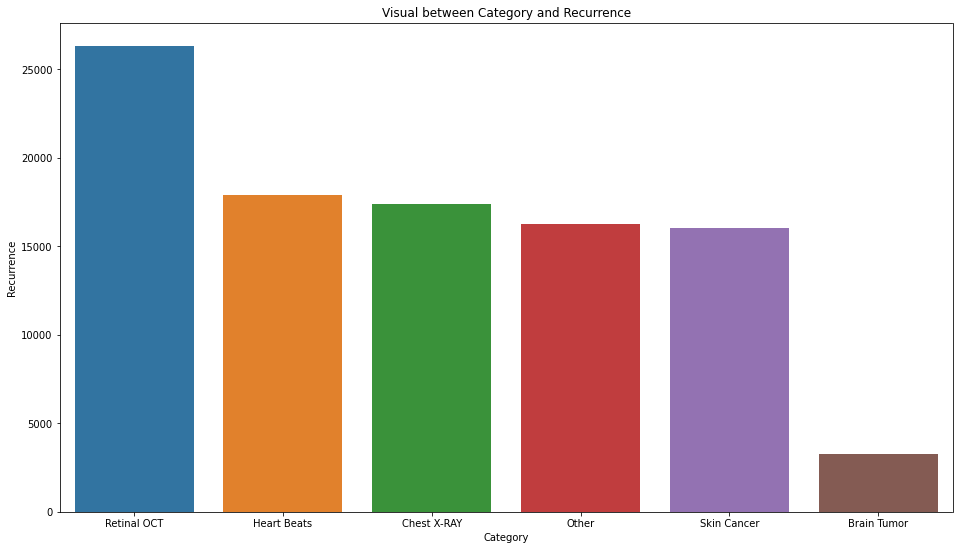

In [36]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Category and Recurrence')
plt.xlabel('Category')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

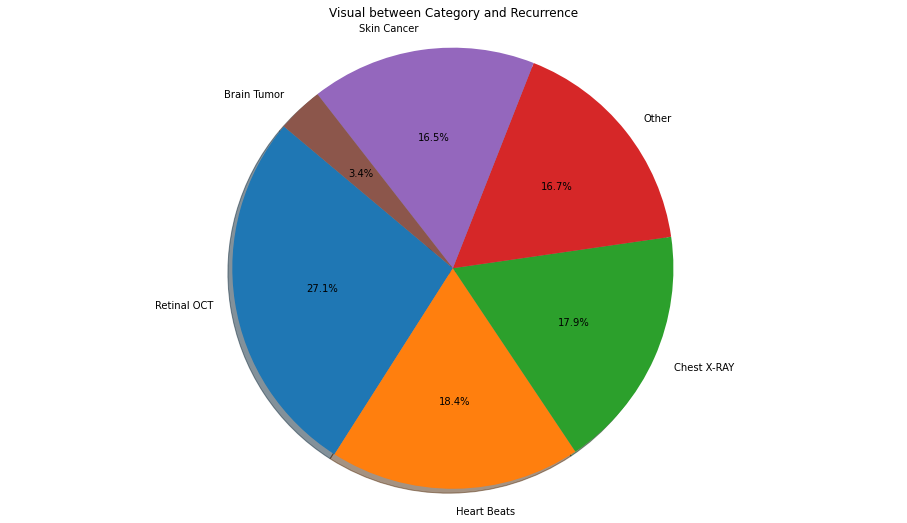

In [37]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Category and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [38]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is Retinal OCT which amounts to his recurrence 26315 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


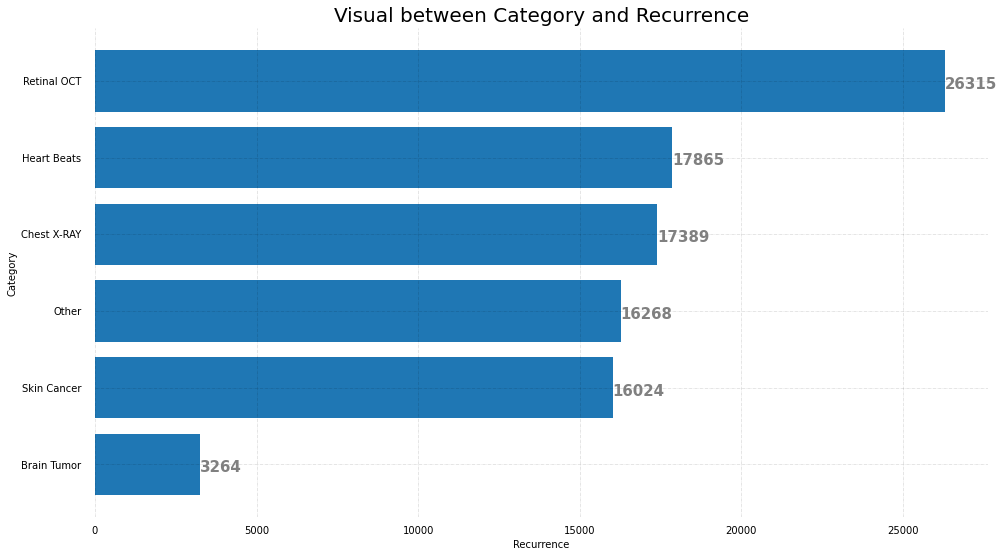

In [39]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Category')
ax.set_title('Visual between Category and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [40]:
df_chest = df[df['class'] == 0]
df_brain = df[df['class'] == 1]
df_heart = df[df['class'] == 2]
df_skin = df[df['class'] == 3]
df_retinal = df[df['class'] == 4]
df_other = df[df['class'] == 5]

## We will split each of dataframe to three dataframe ( Train , Validate , Test)
#### Train 70%
#### Valid 20%
#### Test 10%

### We will split data of Chest

In [41]:
# data of Chest
df_chest_old = df_chest
validate_df_chest = df_chest.sample(frac = 0.2)
train_df_chest = df_chest.drop(validate_df_chest.index)
validate_df_chest = validate_df_chest.reset_index()
train_df_chest = train_df_chest.reset_index()

test_df_chest = train_df_chest.sample(frac = 0.1)
train_df_chest = train_df_chest.drop(test_df_chest.index)
test_df_chest= test_df_chest.reset_index()
train_df_chest = train_df_chest.reset_index()

In [42]:
len(df_chest_old) , len(train_df_chest) , len(validate_df_chest) ,len(test_df_chest)

(17389, 12520, 3478, 1391)

### We will split data of Brain Tumor

In [43]:
# data of Brain Tumor
df_brain_old = df_brain
validate_df_brain = df_brain.sample(frac = 0.2)
train_df_brain = df_brain.drop(validate_df_brain.index)
validate_df_brain = validate_df_brain.reset_index()
train_df_brain = train_df_brain.reset_index()

test_df_brain = train_df_brain.sample(frac = 0.1)
train_df_brain = train_df_brain.drop(test_df_brain.index)
test_df_brain= test_df_brain.reset_index()
train_df_brain = train_df_brain.reset_index()

In [44]:
len(df_brain_old) , len(train_df_brain) , len(validate_df_brain) ,len(test_df_brain)

(3264, 2350, 653, 261)

### We will split data of Heart Beats

In [45]:
# data of Heart Beats
df_heart_old = df_heart
validate_df_heart= df_heart.sample(frac = 0.2)
train_df_heart= df_heart.drop(validate_df_heart.index)
validate_df_heart = validate_df_heart.reset_index()
train_df_heart = train_df_heart.reset_index()

test_df_heart = train_df_heart.sample(frac = 0.1)
train_df_heart = train_df_heart.drop(test_df_heart.index)
test_df_heart= test_df_heart.reset_index()
train_df_heart = train_df_heart.reset_index()

In [46]:
len(df_heart_old) , len(train_df_heart) , len(validate_df_heart) ,len(test_df_heart)

(17865, 12863, 3573, 1429)

### We will split data of Skin Cancer

In [47]:
# data of Heart Beats
df_skin_old = df_skin
validate_df_skin = df_skin.sample(frac = 0.2)
train_df_skin= df_skin.drop(validate_df_skin.index)
validate_df_skin = validate_df_skin.reset_index()
train_df_skin = train_df_skin.reset_index()

test_df_skin = train_df_skin.sample(frac = 0.1)
train_df_skin = train_df_skin.drop(test_df_skin.index)
test_df_skin = test_df_skin.reset_index()
train_df_skin = train_df_skin.reset_index()

In [48]:
len(df_skin_old) , len(train_df_skin) , len(validate_df_skin) ,len(test_df_skin)

(16024, 11537, 3205, 1282)

### We will split data of Retinal

In [49]:
# data of retinal
df_retinal_old = df_retinal
validate_df_retinal = df_retinal.sample(frac = 0.2)
train_df_retinal= df_retinal.drop(validate_df_retinal.index)
validate_df_retinal = validate_df_retinal.reset_index()
train_df_retinal = train_df_retinal.reset_index()

test_df_retinal = train_df_retinal.sample(frac = 0.1)
train_df_retinal = train_df_retinal.drop(test_df_retinal.index)
test_df_retinal = test_df_retinal.reset_index()
train_df_retinal= train_df_retinal.reset_index()

In [50]:
len(df_retinal_old) , len(train_df_retinal) , len(validate_df_retinal) ,len(test_df_retinal)

(26315, 18947, 5263, 2105)

### We will split data of Other

In [51]:
# data of Other
df_other_old = df_other
validate_df_other = df_other.sample(frac = 0.2)
train_df_other= df_other.drop(validate_df_other.index)
validate_df_other = validate_df_other.reset_index()
train_df_other = train_df_other.reset_index()

test_df_other = train_df_other.sample(frac = 0.1)
train_df_other = train_df_other.drop(test_df_other.index)
test_df_other = test_df_other.reset_index()
train_df_other = train_df_other.reset_index()

In [52]:
len(df_other_old) , len(train_df_other) , len(validate_df_other) ,len(test_df_other)

(16268, 11713, 3254, 1301)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [53]:
!mkdir TRAIN  TRAIN/Chest TRAIN/SkinCancer TRAIN/HeartBeats TRAIN/BrainTumor TRAIN/Retinal  TRAIN/Other
!mkdir VAL  VAL/Chest VAL/SkinCancer VAL/HeartBeats VAL/BrainTumor VAL/Retinal   VAL/Other
!mkdir TEST  TEST/Chest TEST/SkinCancer TEST/HeartBeats TEST/BrainTumor TEST/Retinal   TEST/Other

In [54]:
IMG_SIZE = (300,300)
def process_save_img(size,full_path_img,name_image,new_folder):
    img = cv2.imread(full_path_img)
    img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(new_folder+'/'+name_image, img)

In [55]:
#DataSet Chest
for filename in tqdm(train_df_chest['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Chest')
print('finish TRAIN/Chest')
for filename in tqdm(validate_df_chest['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Chest')
print('finish VAL/Chest')
for filename in tqdm(test_df_chest['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Chest')
print('finish TEST/Chest')


#DataSet BrainTumor
for filename in tqdm(train_df_brain['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/BrainTumor')
print('finish TRAIN/BrainTumor')
for filename in tqdm(validate_df_brain['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/BrainTumor')
print('finish VAL/BrainTumor')
for filename in tqdm(test_df_brain['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/BrainTumor')
print('finish TEST/BrainTumor')


#DataSet HeartBeats
for filename in tqdm(train_df_heart['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/HeartBeats')
print('finish TRAIN/HeartBeats')
for filename in tqdm(validate_df_heart['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/HeartBeats')
print('finish VAL/HeartBeats')
for filename in tqdm(test_df_heart['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/HeartBeats')
print('finish TEST/HeartBeats')


#DataSet SkinCancer
for filename in tqdm(train_df_skin['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/SkinCancer')
print('finish TRAIN/SkinCancer')
for filename in tqdm(validate_df_skin['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/SkinCancer')
print('finish VAL/SkinCancer')
for filename in tqdm(test_df_skin['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/SkinCancer')
print('finish TEST/SkinCancer')

#DataSet SkinCancer
for filename in tqdm(train_df_retinal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Retinal')
print('finish TRAIN/Retinal')
for filename in tqdm(validate_df_retinal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Retinal')
print('finish VAL/Retinal')
for filename in tqdm(test_df_retinal['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Retinal')
print('finish TEST/Retinal')

#DataSet Other
for filename in tqdm(train_df_other['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Other')
print('finish TRAIN/Other')
for filename in tqdm(validate_df_other['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Other')
print('finish VAL/Other')
for filename in tqdm(test_df_other['path']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Other')
print('finish TEST/Other')

100%|██████████| 12520/12520 [03:01<00:00, 68.93it/s]


finish TRAIN/Chest


100%|██████████| 3478/3478 [00:50<00:00, 69.32it/s]


finish VAL/Chest


100%|██████████| 1391/1391 [00:20<00:00, 69.14it/s]


finish TEST/Chest


100%|██████████| 2350/2350 [00:24<00:00, 97.11it/s] 


finish TRAIN/BrainTumor


100%|██████████| 653/653 [00:06<00:00, 96.04it/s] 


finish VAL/BrainTumor


100%|██████████| 261/261 [00:02<00:00, 100.58it/s]


finish TEST/BrainTumor


100%|██████████| 12863/12863 [01:32<00:00, 138.33it/s]


finish TRAIN/HeartBeats


100%|██████████| 3573/3573 [00:26<00:00, 136.45it/s]


finish VAL/HeartBeats


100%|██████████| 1429/1429 [00:10<00:00, 139.76it/s]


finish TEST/HeartBeats


100%|██████████| 11537/11537 [03:31<00:00, 54.46it/s]


finish TRAIN/SkinCancer


100%|██████████| 3205/3205 [00:57<00:00, 55.93it/s]


finish VAL/SkinCancer


100%|██████████| 1282/1282 [00:23<00:00, 55.59it/s]


finish TEST/SkinCancer


100%|██████████| 5263/5263 [01:03<00:00, 82.63it/s]s]


finish VAL/Retinal


100%|██████████| 2105/2105 [00:25<00:00, 82.95it/s]


finish TEST/Retinal


100%|██████████| 11713/11713 [03:50<00:00, 50.83it/s]


finish TRAIN/Other


100%|██████████| 3254/3254 [00:53<00:00, 60.86it/s]


finish VAL/Other


100%|██████████| 1301/1301 [00:21<00:00, 59.62it/s]

finish TEST/Other


In [56]:
print('Length Of Data { Chest } Train : ',len(os.listdir('TRAIN/Chest')))
print('Length Of Data { Chest } VAL : ',len(os.listdir('VAL/Chest')))
print('Length Of Data { Chest } TEST : ',len(os.listdir('TEST/Chest')))

print('Length Of Data { Other } Train : ',len(os.listdir('TRAIN/Other')))
print('Length Of Data { Other } VAL : ',len(os.listdir('VAL/Other')))
print('Length Of Data { Other } TEST : ',len(os.listdir('TEST/Other')))

print('Length Of Data { BrainTumor } Train : ',len(os.listdir('TRAIN/BrainTumor')))
print('Length Of Data { BrainTumor } VAL : ',len(os.listdir('VAL/BrainTumor')))
print('Length Of Data { BrainTumor } TEST : ',len(os.listdir('TEST/BrainTumor')))

print('Length Of Data { HeartBeats } Train : ',len(os.listdir('TRAIN/HeartBeats')))
print('Length Of Data { HeartBeats } VAL : ',len(os.listdir('VAL/HeartBeats')))
print('Length Of Data { HeartBeats } TEST : ',len(os.listdir('TEST/HeartBeats')))

print('Length Of Data { Retinal } Train : ',len(os.listdir('TRAIN/Retinal')))
print('Length Of Data { Retinal } VAL : ',len(os.listdir('VAL/Retinal')))
print('Length Of Data { Retinal } TEST : ',len(os.listdir('TEST/Retinal')))

print('Length Of Data { SkinCancer } Train : ',len(os.listdir('TRAIN/SkinCancer')))
print('Length Of Data { SkinCancer } VAL : ',len(os.listdir('VAL/SkinCancer')))
print('Length Of Data { SkinCancer } TEST : ',len(os.listdir('TEST/SkinCancer')))

Length Of Data { Chest } Train :  12520
Length Of Data { Chest } VAL :  3478
Length Of Data { Chest } TEST :  1391
Length Of Data { Other } Train :  11713
Length Of Data { Other } VAL :  3254
Length Of Data { Other } TEST :  1301
Length Of Data { BrainTumor } Train :  2103
Length Of Data { BrainTumor } VAL :  617
Length Of Data { BrainTumor } TEST :  255
Length Of Data { HeartBeats } Train :  12863
Length Of Data { HeartBeats } VAL :  3573
Length Of Data { HeartBeats } TEST :  1429
Length Of Data { Retinal } Train :  18947
Length Of Data { Retinal } VAL :  5263
Length Of Data { Retinal } TEST :  2105
Length Of Data { SkinCancer } Train :  8210
Length Of Data { SkinCancer } VAL :  2937
Length Of Data { SkinCancer } TEST :  1241


In [ ]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [57]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_gen = ImageDataGenerator(rescale = 1./255)

In [58]:
IMG_SIZE = (224,224)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 66356 images belonging to 6 classes.
Found 7722 images belonging to 6 classes.
Found 19122 images belonging to 6 classes.


In [90]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 66356 images belonging to 6 classes.
Found 7722 images belonging to 6 classes.
Found 19122 images belonging to 6 classes.


<a id='demo'></a>
## Demo

In [ ]:
idx2label_dict = {train.class_indices[k]: k for k in train.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in train:
        image = X_batch[0]        
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray')
        break
plt.tight_layout()
plt.show()

In [59]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [60]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',classes = np.unique(trainRgb.classes),y = trainRgb.classes)
cw = dict(zip( np.unique(trainRgb.classes), weights))
print(cw)

{0: 5.258836582659693, 1: 0.8833333333333333, 2: 0.8597786934100391, 3: 0.9441930618401206, 4: 0.5836983867278901, 5: 1.3470564352415753}


<a id='build'></a>
## Model Building

<a id='scrath'></a>
## Model from Scratch

<a id='scrathf'></a>
## Model from Simple Scratch

In [61]:
input_shape = (224,224,3)
scratchSimple = Sequential()
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Flatten())
scratchSimple.add(Dense(activation = 'relu', units = 128))
scratchSimple.add(Dense(activation = 'relu', units = 64))
scratchSimple.add(Dense(activation = 'softmax', units = 6))
scratchSimple.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchSimple.summary()

2022-06-01 19:02:24.216024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 19:02:24.336957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 19:02:24.337701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-01 19:02:24.340632: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

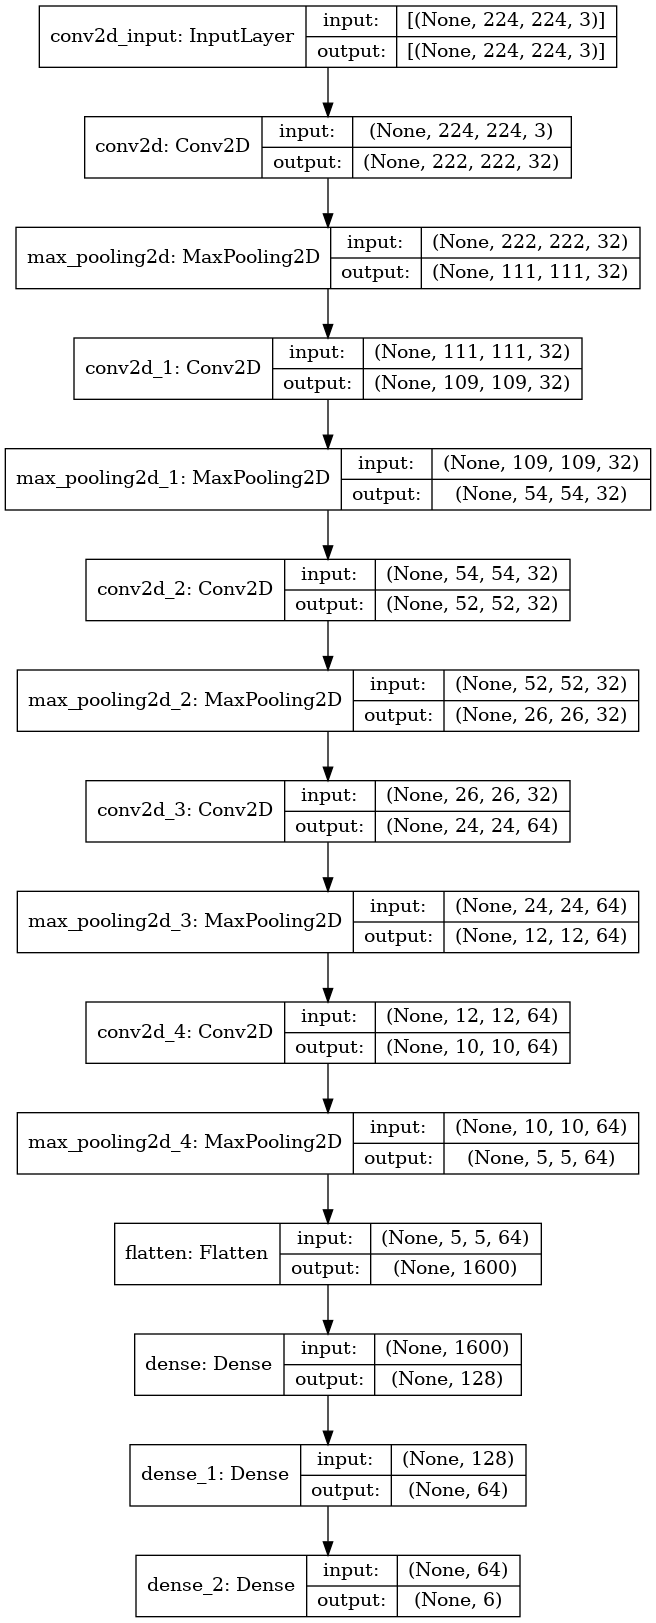

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(scratchSimple,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [63]:
epochs = 5

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-01 19:02:28.550355: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-01 19:02:28.697149: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-06-01 19:02:30.871459: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-01 19:02:31.811713: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-06-01 19:02:31.862133: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-01 19:02:32.832730: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.
2022-06-01 19:02:33.768743: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 38535168 exceeds 10% of free system memory.


1036/1036 [==============================] - 886s 847ms/step - loss: 0.1061 - accuracy: 0.9690 - val_loss: 0.0332 - val_accuracy: 0.9912
Epoch 2/5
1036/1036 [==============================] - 846s 817ms/step - loss: 0.0264 - accuracy: 0.9931 - val_loss: 0.0448 - val_accuracy: 0.9874
Epoch 3/5
1036/1036 [==============================] - 832s 803ms/step - loss: 0.0336 - accuracy: 0.9911 - val_loss: 0.0086 - val_accuracy: 0.9976
Epoch 4/5
1036/1036 [==============================] - 837s 808ms/step - loss: 0.0169 - accuracy: 0.9957 - val_loss: 0.0232 - val_accuracy: 0.9934
Epoch 5/5
1036/1036 [==============================] - 832s 803ms/step - loss: 0.0218 - accuracy: 0.9947 - val_loss: 0.0196 - val_accuracy: 0.9944

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
7722/7722 [==============================] - 38s 5ms/step - loss: 0.0238 - accuracy: 0.9937
The testing accuracy is : 99.36544895172119 %


In [64]:
scratchSimple.save('./scratchSimple.h5')

 <a id='trainVGG16'></a>
## Model VGG16 ( trainable  )

In [68]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16= Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(128,activation='relu'))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Dense(6, activation='softmax'))
model_VGG16.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [69]:
epochs = 3

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_VGG16.save('./model_VGG16.h5')

Epoch 1/3
1036/1036 [==============================] - 1013s 961ms/step - loss: 0.0491 - accuracy: 0.9871 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 2/3
1036/1036 [==============================] - 985s 951ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 3/3
7722/7722 [==============================] - 59s 8ms/step - loss: 0.0018 - accuracy: 0.9991
The testing accuracy is : 99.90934729576111 %


 <a id='freezeVGG16'></a>
## Model VGG16 ( false trainable )

In [71]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16F= Sequential()
for layer in VGG16.layers:
    layer.trainable = False
model_VGG16F.add(VGG16)
model_VGG16F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16F.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Flatten())
model_VGG16F.add(Dense(128,activation='relu'))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Dense(6, activation='softmax'))
model_VGG16F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16F.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [72]:
epochs = 3

historyVGG16F = model_VGG16F.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16F.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_VGG16F.save('./model_VGG16F.h5')

Epoch 1/3
1036/1036 [==============================] - 883s 852ms/step - loss: 0.1014 - accuracy: 0.9762 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 2/3
1036/1036 [==============================] - 874s 843ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.0046 - val_accuracy: 0.9985
Epoch 3/3
7722/7722 [==============================] - 58s 7ms/step - loss: 0.0027 - accuracy: 0.9988
The testing accuracy is : 99.8834490776062 %


In [75]:
model_VGG16F.save('./model_VGG16F.h5')

<a id='ResNet152V2'></a>
## Model ResNet152V2 

<a id='trainResNet152V2'></a>
## Model ResNet152V2 ( trainable  )

In [76]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
model_Resnet = Sequential()
model_Resnet.add(ResNet152V2)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(512, activation='relu'))
model_Resnet.add(Dense(6, activation='softmax'))
model_Resnet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Resnet.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 3078      
Total params: 109,715,462
Trainable params: 109,571,718
Non-trainable params: 143,744
_________________________________________________________________


In [77]:
epochs = 3
historyResnet = model_Resnet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Resnet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_Resnet.save('./model_Resnet.h5')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/3
1036/1036 [==============================] - 1183s 1s/step - loss: 0.0188 - accuracy: 0.9967 - val_loss: 50.0199 - val_accuracy: 0.6156
Epoch 2/3
1036/1036 [==============================] - 1192s 1s/step - loss: 0.0179 - accuracy: 0.9976 - val_loss: 5.8887e-04 - val_accuracy: 0.9998
Epoch 3/3
7722/7722 [==============================] - 227s 29ms/step - loss: 0.0030 - accuracy: 0.9991
The testing accuracy is : 99.90934729576111 %


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<a id='freezeResNet152V2'></a>
## Model ResNet152V2 ( false trainable  )

In [78]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in ResNet152V2.layers:
        layer.trainable=False
model_ResnetF = Sequential()
model_ResnetF.add(ResNet152V2)
model_ResnetF.add(Flatten())
model_ResnetF.add(Dense(512, activation='relu'))
model_ResnetF.add(Dense(6, activation='softmax'))
model_ResnetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_ResnetF.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 3078      
Total params: 109,715,462
Trainable params: 51,383,814
Non-trainable params: 58,331,648
_________________________________________________________________


In [79]:
epochs = 3
historyResnetF = model_ResnetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_ResnetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %
model_ResnetF.save('./model_ResnetF.h5')

Epoch 1/3
1036/1036 [==============================] - 956s 915ms/step - loss: 0.0196 - accuracy: 0.9979 - val_loss: 0.0130 - val_accuracy: 0.9996
Epoch 2/3
1036/1036 [==============================] - 960s 926ms/step - loss: 0.0074 - accuracy: 0.9996 - val_loss: 0.0039 - val_accuracy: 0.9997
Epoch 3/3
7722/7722 [==============================] - 228s 30ms/step - loss: 1.3862e-08 - accuracy: 1.0000
The testing accuracy is : 100.0 %


<a id='Xception'></a>
## Model Xception 

<a id='aXception'></a>
## Model Xception ( trainable  )           

In [80]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
model_Xception= Sequential()
model_Xception.add(Xception)
model_Xception.add(Conv2D(64, (3, 3), activation = 'relu'))
model_Xception.add(MaxPooling2D(pool_size = (2, 2)))
model_Xception.add(Dropout(0.10))
model_Xception.add(Flatten())
model_Xception.add(Dense(128,activation='relu'))
model_Xception.add(Dropout(0.10))
model_Xception.add(Dense(6, activation='softmax'))
model_Xception.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Xception.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_______________________________________________________

In [81]:
epochs = 3

historyXception = model_Xception.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_Xception.save('./model_Xception.h5')

Epoch 1/3
1036/1036 [==============================] - 1153s 1s/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 2.2138e-04 - val_accuracy: 0.9999
Epoch 2/3
1036/1036 [==============================] - 1141s 1s/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 2.1218e-04 - val_accuracy: 0.9999
Epoch 3/3
7722/7722 [==============================] - 90s 12ms/step - loss: 6.4924e-05 - accuracy: 1.0000
The testing accuracy is : 100.0 %


<a id='bXception'></a>
## Model Xception ( false trainable  )    

In [82]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in Xception.layers:
    layer.trainable = False
model_XceptionF = Sequential()
model_XceptionF.add(Xception)
model_XceptionF.add(Conv2D(64, (3, 3), activation = 'relu'))
model_XceptionF.add(MaxPooling2D(pool_size = (2, 2)))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Flatten())
model_XceptionF.add(Dense(128,activation='relu'))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Dense(6, activation='softmax'))
model_XceptionF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_XceptionF.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [83]:
epochs = 3

historyXceptionF = model_XceptionF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_XceptionF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_XceptionF.save('./model_XceptionF.h5')

Epoch 1/3
1036/1036 [==============================] - 903s 869ms/step - loss: 0.0195 - accuracy: 0.9953 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 2/3
1036/1036 [==============================] - 896s 865ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 3/3
1036/1036 [==============================] - 898s 867ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 0.9992

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
7722/7722 [==============================] - 90s 12ms/step - loss: 0.0040 - accuracy: 0.9990
The testing accuracy is : 99.8964011669159 %


 <a id='MobileNet'></a>
## Model MobileNet  

# <a id='trainMobileNet'></a>
## Model MobileNet (  trainable  )    

In [84]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,pooling='avg',classes=4,weights='imagenet')
model_MobileNet = Sequential()
model_MobileNet.add(MobileNet)
model_MobileNet.add(Flatten())
model_MobileNet.add(Dense(512, activation='relu'))
model_MobileNet.add(Dense(6, activation='softmax'))
model_MobileNet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNet.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 3078      
Total params: 3,756,742
Trainable params: 3,734,854
Non-trainable params: 21,888
_________________________________________________________________


In [85]:
epochs = 3

historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_MobileNet.save('./model_MobileNet.h5')

Epoch 1/3
1036/1036 [==============================] - 943s 908ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 1.3818e-04 - val_accuracy: 0.9999
Epoch 2/3
1036/1036 [==============================] - 941s 908ms/step - loss: 9.0065e-04 - accuracy: 0.9997 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/3
1036/1036 [==============================] - 937s 904ms/step - loss: 4.5868e-04 - accuracy: 0.9999 - val_loss: 5.5302e-05 - val_accuracy: 1.0000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
7722/7722 [==============================] - 54s 7ms/step - loss: 1.7926e-04 - accuracy: 0.9999
The testing accuracy is : 99.98704791069031 %


 <a id='freezeMobileNet'></a>
## Model MobileNet ( false trainable  )    

In [86]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,pooling='avg',classes=4,weights='imagenet')
for layer in MobileNet.layers:
        layer.trainable=False
model_MobileNetF = Sequential()
model_MobileNetF.add(MobileNet)
model_MobileNetF.add(Flatten())
model_MobileNetF.add(Dense(512, activation='relu'))
model_MobileNetF.add(Dense(6, activation='softmax'))
model_MobileNetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNetF.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 3078      
Total params: 3,756,742
Trainable params: 527,878
Non-trainable params: 3,228,864
_________________________________________________________________


In [87]:
epochs = 3

historyMobileNetF = model_MobileNetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_MobileNetF.save('./model_MobileNetF.h5')

Epoch 1/3
1036/1036 [==============================] - 843s 813ms/step - loss: 0.0243 - accuracy: 0.9940 - val_loss: 8.8066e-04 - val_accuracy: 0.9998
Epoch 2/3
1036/1036 [==============================] - 838s 809ms/step - loss: 7.1701e-04 - accuracy: 0.9998 - val_loss: 7.5831e-04 - val_accuracy: 0.9998
Epoch 3/3
7722/7722 [==============================] - 55s 7ms/step - loss: 5.2603e-04 - accuracy: 0.9997
The testing accuracy is : 99.97410178184509 %


<a id='InceptionV3'></a>
## Model InceptionV3 

<a id='trainInceptionV3'></a>
## Model InceptionV3 ( trainable )    

In [92]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
model_InceptionV3= Sequential()
model_InceptionV3.add(InceptionV3)
model_InceptionV3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(128,activation='relu'))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Dense(6, activation='softmax'))
model_InceptionV3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [93]:
epochs = 3

historyInception = model_InceptionV3.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_InceptionV3.save('./model_InceptionV3.h5')

Epoch 1/3
1036/1036 [==============================] - 1541s 1s/step - loss: 0.0146 - accuracy: 0.9959 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 2/3
1036/1036 [==============================] - 1538s 1s/step - loss: 9.7674e-04 - accuracy: 0.9997 - val_loss: 2.0261e-04 - val_accuracy: 0.9999
Epoch 3/3
7722/7722 [==============================] - 154s 20ms/step - loss: 2.7064e-04 - accuracy: 1.0000
The testing accuracy is : 100.0 %


<a id='freezeInceptionV3'></a>
## Model InceptionV3 ( false trainable  )    

In [94]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in InceptionV3.layers:
    layer.trainable = False
model_InceptionV3F= Sequential()
model_InceptionV3F.add(InceptionV3)
model_InceptionV3F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3F.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Flatten())
model_InceptionV3F.add(Dense(128,activation='relu'))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Dense(6, activation='softmax'))
model_InceptionV3F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3F.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               73856     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)             

In [ ]:
epochs = 3

historyInceptionV3F = model_InceptionV3F.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3F.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')
model_InceptionV3F.save('./model_InceptionV3F.h5')

Epoch 1/3
1036/1036 [==============================] - 1403s 1s/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.0025 - val_accuracy: 0.9993
Epoch 2/3
1036/1036 [==============================] - 1405s 1s/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 3/3
7253/7722 [===========================>..] - ETA: 9s - loss: 6.4298e-04 - accuracy: 0.9997

In [ ]:
pd.DataFrame(scratchSimple.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

In [ ]:
plt.plot(scratchSimple.history['accuracy'])
plt.plot(scratchSimple.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(scratchSimple.history['loss'])
plt.plot(scratchSimple.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<a id='perf'></a>
## Model Performance

In [ ]:
test_accu = model_InceptionV3.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [ ]:
from keras.models import load_model
model = load_model('./model_InceptionV3.h5.h5')

In [ ]:
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
idx2label_dict

In [ ]:
predict_x=model_InceptionV3.predict(testRgb) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
y_true = testRgb.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3,4]),
                  index=["Actual " + idx2label_dict[0],
                         "Actual " + idx2label_dict[1],
                         "Actual " + idx2label_dict[2],
                         "Actual " + idx2label_dict[3],
                         "Actual " + idx2label_dict[4],
                         "Actual " + idx2label_dict[5]],
                  
                  columns=["Predicted "+ idx2label_dict[0],
                           "Predicted "+ idx2label_dict[1],
                           "Predicted "+ idx2label_dict[2],
                           "Predicted "+ idx2label_dict[3],
                           "Predicted "+ idx2label_dict[4],
                           "Predicted "+ idx2label_dict[5]])

seaborn.heatmap(cm,annot=True,fmt="d");

test_accuracy = model_InceptionV3.evaluate(testRgb)
print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

In [ ]:
plt.figure(figsize=(25,25))
randomlist = random.sample(range(0, 6255), 25)
index_list = 0
for i in range(0+228, 25+228):
        plt.subplot(5, 5, (i-228)+1)
        index = np.argmax(predict_x[randomlist[index_list]],axis=0)
        out = str(predict_x[randomlist[index_list]][index]*100)[:4] + ' probability of being '+idx2label_dict[y_pred[randomlist[index_list]]]+' case'
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(testRgb[randomlist[index_list]][0]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [ ]:
img = cv2.imread('../input/testtest/index.jpg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model_MobileNet.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)

<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [ ]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = '././model_VGG16.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("./model_VGG16.tflite","wb").write(tflite_model)

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./model_VGG16.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))